In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omerfaruk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
base_dir = "/Users/omerfaruk/Documents/GitHub/FakeNewsDetector"
fake_path = os.path.join(base_dir, 'data', 'Fake.csv')
true_path = os.path.join(base_dir, 'data', 'True.csv')

fake_news = pd.read_csv(fake_path)
true_news = pd.read_csv(true_path)

# Add a "class" label, 0 = fake, 1 = real
fake_news['class'] = 0
true_news['class'] = 1

df = pd.concat([fake_news, true_news], axis=0).sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,class
0,China gives greenlight to dozens of Trump trad...,SHANGHAI/WASHINGTON (Reuters) - China has gran...,politicsNews,"March 8, 2017",1
1,14 people shot dead at Mexican drug rehab center,MEXICO CITY (Reuters) - Fourteen people were s...,worldnews,"September 27, 2017",1
2,GOP Senator Loses His Sh*t On Twitter Over Tr...,"On Monday morning, Donald Trump appeared on Fo...",News,"April 12, 2016",0
3,Trump Is FUMING Over Bad Charlottesville Pres...,"Once again, Donald Trump is having a completel...",News,"August 15, 2017",0
4,Amnesty International’s Brilliant ‘Gay Turtle...,Amnesty International recently put out a brill...,News,"May 3, 2016",0


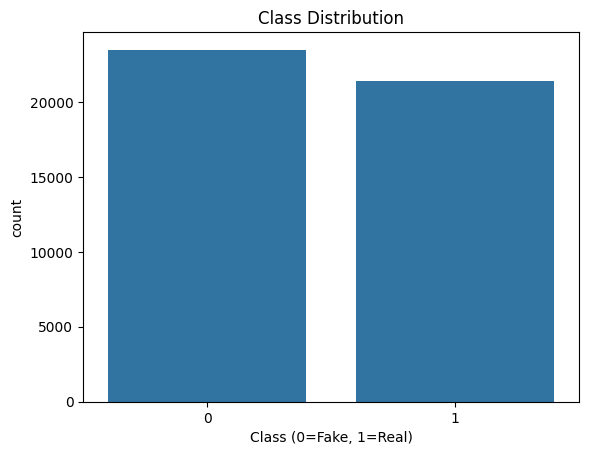

In [12]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0=Fake, 1=Real)')
plt.show()

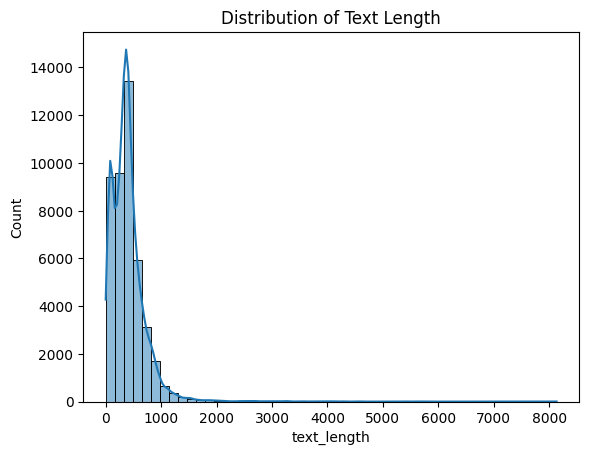

In [13]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.show()

In [20]:
# Create a set of English stopwords for O(1) lookup
stop_words = set(stopwords.words('english'))

def simple_clean(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

fake_text = " ".join(fake_news['text'].astype(str))
real_text = " ".join(true_news['text'].astype(str))

# Clean your text
fake_text_clean = simple_clean(fake_text)
real_text_clean = simple_clean(real_text)

# Split into tokens
fake_words = fake_text_clean.split()
real_words = real_text_clean.split()

# Filter out stopwords and any empty strings
fake_words_no_stop = [w for w in fake_words if w not in stop_words and w.strip() != '']
real_words_no_stop = [w for w in real_words if w not in stop_words and w.strip() != '']

print("Most common words in fake news (no stopwords):")
print(Counter(fake_words_no_stop).most_common(20))

print("Most common words in real news (no stopwords):")
print(Counter(real_words_no_stop).most_common(20))


Most common words in fake news (no stopwords):
[('trump', 73421), ('said', 31008), ('people', 25941), ('president', 25495), ('would', 23420), ('one', 22865), ('us', 22005), ('clinton', 17957), ('obama', 17760), ('like', 17596), ('donald', 17101), ('also', 15221), ('new', 14135), ('news', 14099), ('even', 13658), ('hillary', 13510), ('white', 12767), ('time', 12689), ('state', 12494), ('via', 11164)]
Most common words in real news (no stopwords):
[('said', 99039), ('trump', 42599), ('us', 41144), ('would', 31520), ('reuters', 28404), ('president', 25548), ('state', 18747), ('government', 17980), ('states', 17638), ('new', 16786), ('house', 16406), ('also', 15952), ('united', 15572), ('republican', 15292), ('people', 15116), ('told', 14244), ('could', 13705), ('one', 12678), ('last', 12614), ('washington', 12143)]


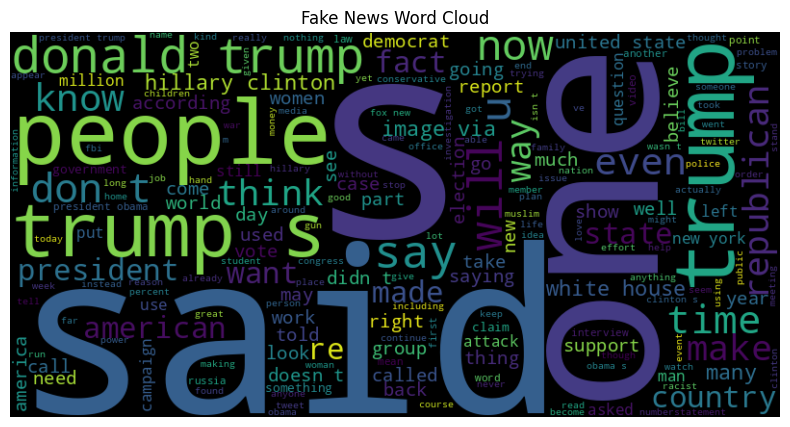

In [ ]:
# pip install wordcloud
from wordcloud import WordCloud

fake_wordcloud = WordCloud(width=800, height=400).generate(fake_text)
plt.figure(figsize=(10,5))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()
